In [29]:
import os
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from P02_MSIE.T11_refactor.vrptw_v12 import VRPTW

CURRENT_DIR = os.getcwd()
print(f"Current Directory: {CURRENT_DIR}")
datetime_now = datetime.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(f"{CURRENT_DIR}/_tmp", exist_ok=True)


Current Directory: c:\Users\admin\Coding\research\rl-meta-test\src\P02_MSIE\T11_refactor


In [30]:
folder = "R_20251116_091553"
prefix = "sol"
it = 44931

In [31]:
with open(f"./saved_models/{folder}/{prefix}_{it:05d}_exp.pkl", "rb") as f:
    exp = pickle.load(f)
exp.tail()

,action,reward,done,idx_iteration,F,CR,MG,best_solution,convergence_rate,std_population,...,patience_remaining,F_sc,CR_sc,MG_sc,best_solution_sc,std_population_sc,best_trial_fitness_sc,std_trial_fitness_sc,patience_remaining_sc,TimeLimit.truncated
246,"[-0.49996641278266907, 0.49991971254348755, 0....",0.000076,False,2469,-9.999328,0.999920,0.999956,191.81362,1.0,120.334781,...,41,-0.499966,0.499920,0.499956,0.191814,0.120335,0.637274,0.072480,0.05125,False
247,"[0.3464632034301758, -0.4817148745059967, -0.4...",0.000067,False,2479,6.929264,0.018285,0.049639,191.81362,1.0,136.017010,...,31,0.346463,-0.481715,-0.450361,0.191814,0.136017,0.191814,0.137303,0.03875,False
248,"[-0.4999992847442627, 0.49979615211486816, 0.5]",0.000059,False,2489,-9.999986,0.999796,1.000000,191.81362,1.0,118.794787,...,21,-0.499999,0.499796,0.500000,0.191814,0.118795,0.671959,0.060770,0.02625,False
249,"[0.33421409130096436, -0.4813472032546997, -0....",0.000052,False,2499,6.684282,0.018653,0.069858,191.81362,1.0,131.141883,...,11,0.334214,-0.481347,-0.430142,0.191814,0.131142,0.191814,0.134018,0.01375,False
250,"[-0.4999935030937195, 0.4994925260543823, 0.49...",0.000046,False,2509,-9.999870,0.999493,0.999999,191.81362,1.0,115.547617,...,1,-0.499994,0.499493,0.499999,0.191814,0.115548,0.664485,0.071705,0.00125,False


In [32]:
with open(f"./saved_models/{folder}/{prefix}_{it:05d}_vrp.pkl", "rb") as f:
    info = pickle.load(f)

global_solution_history = info["global_solution_history"]
population = info["population"]
fitness_trial_history = info["fitness_trial_history"]
vrptw = info["vrptw"]
episode_reward = info["episode_reward"]
episode_length = info["episode_length"]
best_solution = info["best_solution"]
print(
    f"Episode Reward: {episode_reward}, Episode Length: {episode_length}, Best Solution: {best_solution}"
)

Episode Reward: 36.547205, Episode Length: 252, Best Solution: 191.81361977865598


Best global solution: 191.81361977865598


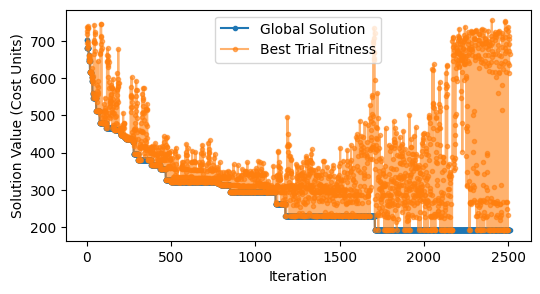

In [33]:
print(f"Best global solution: {min(global_solution_history)}")
# Plot results
fig, ax = plt.subplots(1, figsize=(6, 3))
x = np.arange(len(global_solution_history))
y1 = np.array(global_solution_history)
y2 = np.array(fitness_trial_history)
ax.plot(x, y1, marker=".", label="Global Solution")
ax.plot(x, y2, marker=".", label="Best Trial Fitness", alpha=0.6)
ax.set(
    xlabel="Iteration",
    ylabel="Solution Value (Cost Units)",
    # title=f"Reward Total: {episode_reward:.2f}, Best Solution: {best_solution:.2f}",
)
ax.legend()
# fig.savefig(f"{CURRENT_DIR}/_tmp/plot_{datetime_now}_{it:05d}.png",
#     dpi=300,
# )

fig.savefig(
    f"{CURRENT_DIR}/figures/plot_{folder}_{it:05d}.png",
    dpi=300,
    bbox_inches="tight",
)

In [34]:
current_cost = [vrptw.objective_func(p) for p in population]
idx_min = np.argmin(current_cost)
print(current_cost[idx_min])

191.81361977865598


[0.60972822, 0.60203237, 0.00686598, 0.53469674, 0.        , 0.49675597,
 0.33599047, 0.38668084, 0.47932859, 0.43868915, 0.46238341, 0.97306948,
 0.71317324, 0.96586001, 0.95973565, 0.96018005, 0.7603234 , 0.79858067,
 0.86380217, 0.61021892, 0.70277587, 0.70242004, 0.69298186, 0.63903619,
 0.68150968, 0.23148577, 0.11083296, 0.68725388, 0.48854243, 0.6608216 ,
 0.19798231, 0.93844683, 0.04002987, 0.29185109, 0.54947132, 0.52188057,
 0.34255223, 0.70884523, 0.51688922, 0.62557905, 0.60274914, 0.71878159,
 0.54221278, 0.83607951, 0.16885725, 0.3870068 , 0.64844865, 0.65461664,
 0.81743506, 0.05290498]


<Axes: >

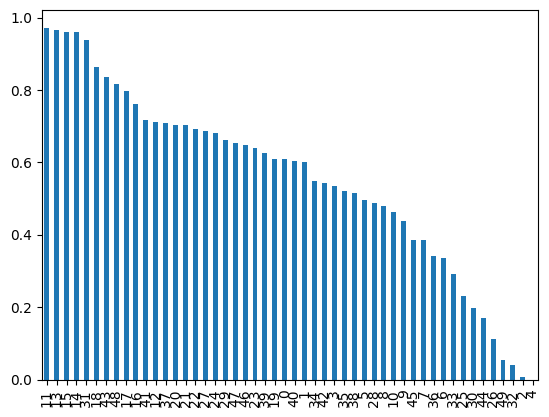

In [35]:
# How to visualize population
best_individual = population[idx_min]
string_representation = np.array2string(best_individual, separator=", ")
print(string_representation)
pd.Series(best_individual).sort_values(ascending=False).plot.bar()

In [36]:
vrptw.objective_func(population[idx_min])

191.81361977865598

In [37]:
exp.columns

Index(['action', 'reward', 'done', 'idx_iteration', 'F', 'CR', 'MG',
       'best_solution', 'convergence_rate', 'std_population',
       'total_iteration', 'best_trial_fitness', 'std_trial_fitness',
       'patience_remaining', 'F_sc', 'CR_sc', 'MG_sc', 'best_solution_sc',
       'std_population_sc', 'best_trial_fitness_sc', 'std_trial_fitness_sc',
       'patience_remaining_sc', 'TimeLimit.truncated'],
      dtype='object')

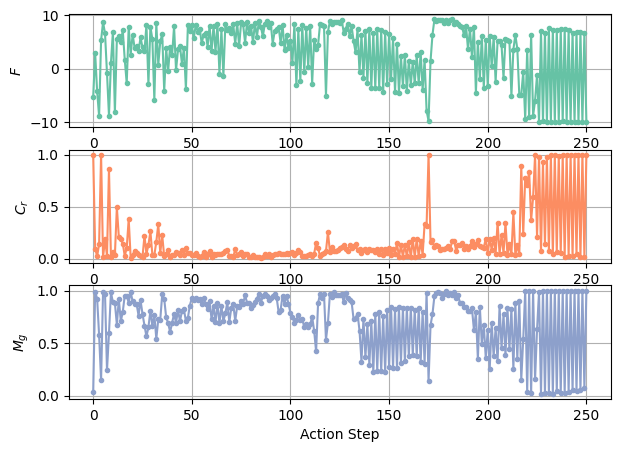

In [39]:
# Plot F, CR, MG over time in 3 subplots
values = ["F", "CR", "MG"]
ylabels = [r'$F$', r'$C_r$', r'$M_g$']
fig, axes = plt.subplots(3, 1, figsize=(7, 5))

# dfp[values].plot(figsize=(12,8), marker=".", subplots=True, ax=ax)
colors = sns.color_palette("Set2", 3)
for i, value in enumerate(values):
    ax = axes[i]
    ax.plot(exp[value], marker=".", color=colors[i])
    ax.set_ylabel(ylabels[i])
    ax.grid(True)

axes[-1].set_xlabel("Action Step")
fig.savefig("figures/parameter_evolution.png", dpi=300, bbox_inches="tight")
